## Essa análise foi realizada por Kizzy Terra do canal Programação Dinâmica

Youtube: https://youtube.com/programacaodinamica

Instagram: https://www.instagram.com/pgdinamica/

https://www.instagram.com/kizzy_terra/


Twitter: https://twitter.com/kizzy_terra

https://twitter.com/pgdinamica


# Análise Exploratória dos Microdados do ENEM

Importando o pacote <strong>Pandas</strong> único que será utilizado nessa aula:

<em>Documentação do Pandas</em>: https://pandas.pydata.org/pandas-docs/stable/index.html

In [2]:
import pandas as pd

In [3]:
microdadosEnem = pd.read_csv("brutos/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv", sep=";", encoding='ISO-8859-1')

In [4]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


In [5]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Selecionamos apenas as colunas que nos interessam:

In [6]:
colunasSelecionadas = ['NU_INSCRICAO',
                       'NU_NOTA_MT','NU_NOTA_REDACAO', 
                       'Q001', 'Q002']

Criamos um novo DataFrame apenas com os dados que serão analisados:

In [8]:
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadas)

Visualizar a cabeça (head) do DataFrame:

In [9]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,NaN,NaN,A,A
1,180007197856,480.3,280.0,B,B
2,180008517434,NaN,NaN,E,E
3,180007661228,NaN,NaN,B,C
4,180008787987,NaN,360.0,C,E


In [10]:
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

In [11]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,480.3,280.0,B,B
5,180007239581,538.8,580.0,C,D
7,180008090447,733.8,680.0,A,E
8,180008257068,459.0,340.0,D,D
9,180008202044,525.4,740.0,C,C


#### O que é esse tal de NaN?

<strong>NaN</strong> significa <em>Not a Number</em> que quer dizer que não é um número.

Saiba mais aqui: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

## Finalmente: o questionário de indicadores socioeconômicos!

Começaremos pelas duas primeiras questões:

Q001 - Até que série seu pai, ou o homem responsável por você, estudou?

Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

### Passo 1 - Definindo um dicionário:
Faremos isso para visualizar melhor o resultado

In [7]:
q001e002Dicionario = {
'A': 'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

In [12]:
microdadosEnemSelecionado.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,200902
B,813670
C,549969
D,460454
E,1043472
F,311918
G,187705
H,325653


### Passo 2 - Criar novas colunas no DataFrame

Inserido coluna NO_Q001:

In [16]:
microdadosEnemSelecionado['NO_Q001'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionado.Q001]

In [17]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou..."
7,180008090447,733.8,680.0,A,E,Nunca estudou
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou..."


Inserido coluna NO_Q002:

In [20]:
microdadosEnemSelecionado['NO_Q002'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionado.Q002]

Olhando o head do DataFrame para verificar a inserção:

In [21]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."


### Passo 3 - Comparando distribução do nível de escolaridade Pai x Mãe no conjunto de dados

Utilizando os métodos do DataFrame filter(), groupby(), count(), sort_values()

documentação disponível em: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html 

1 - distribuição dos candidatos do ENEM 2018 por escolaridade do Pai

In [23]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1043472
Não completou a 4ª série/5º ano do Ensino Fundamental,813670
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549969
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",460454
Não sei,325653
"Completou a Faculdade, mas não completou a Pós-graduação",311918
Nunca estudou,200902
Completou a Pós-graduação,187705


2 - distribuição dos candidatos do ENEM 2018 por escolaridade da Mãe

In [24]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)


,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1275076
Não completou a 4ª série/5º ano do Ensino Fundamental,606702
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515982
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",509545
"Completou a Faculdade, mas não completou a Pós-graduação",417225
Completou a Pós-graduação,322696
Nunca estudou,136414
Não sei,110103


### Passo 4 - Olhando o desempenho em matemática segundo a escolaridade PaixMãe

1 - por Escolaridade do Pai

In [29]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)


,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,628.857128
"Completou a Faculdade, mas não completou a Pós-graduação",606.911985
"Completou o Ensino Médio, mas não completou a Faculdade",550.922641
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",530.540300
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",519.450349
Não sei,512.678252
Não completou a 4ª série/5º ano do Ensino Fundamental,502.412921
Nunca estudou,483.412209


2 - por Escolaridade da Mãe

In [30]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)


,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,604.646114
"Completou a Faculdade, mas não completou a Pós-graduação",591.438424
"Completou o Ensino Médio, mas não completou a Faculdade",541.991564
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",521.292757
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",512.046346
Não sei,504.112213
Não completou a 4ª série/5º ano do Ensino Fundamental,497.003174
Nunca estudou,478.218055


### Passo 5 - Olhando o desempenho em redação segundo a escolaridade PaixMãe

1 - por Escolaridade do Pai

In [31]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)


,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,652.213740
"Completou a Faculdade, mas não completou a Pós-graduação",622.431152
"Completou o Ensino Médio, mas não completou a Faculdade",544.272256
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",511.711832
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.834723
Não sei,474.284161
Não completou a 4ª série/5º ano do Ensino Fundamental,464.490076
Nunca estudou,427.263044


Olhando para essa informação em um gráfico:

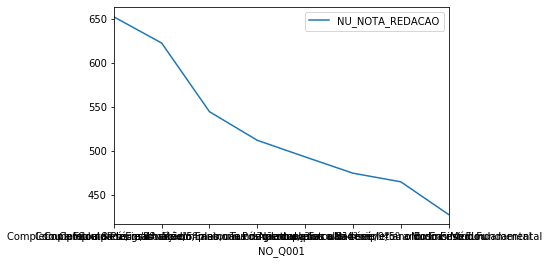

In [37]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001']).\
groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).plot()


2 - por Escolaridade da Mãe

In [39]:
q002Redacao = microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002']).\
groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [40]:
q002Redacao

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,622.780760
"Completou a Faculdade, mas não completou a Pós-graduação",601.241249
"Completou o Ensino Médio, mas não completou a Faculdade",530.016015
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",495.963850
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",479.675260
Não completou a 4ª série/5º ano do Ensino Fundamental,454.591612
Não sei,447.204163
Nunca estudou,414.232410


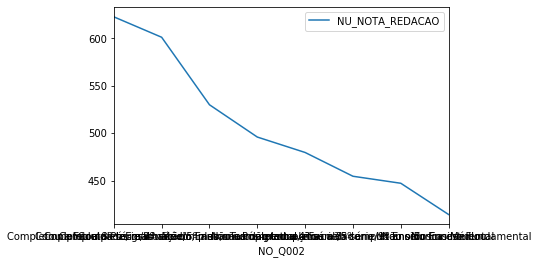

In [41]:
q002Redacao.plot()

Olhando para outras variáveis além da média:

In [42]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...        549969.0   
Completou a 8ª série/9º ano do Ensino Fundament...        460454.0   
Completou a Faculdade, mas não completou a Pós-...        311918.0   
Completou a Pós-graduação                                 187705.0   
Completou o Ensino Médio, mas não completou a F...       1043472.0   
Nunca estudou                                             200902.0   
Não completou a 4ª série/5º ano do Ensino Funda...        813670.0   
Não sei                                                   325653.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  492.834723  173.586452   
Completou a 8ª série/9º ano do Ensino Fundament...  511.711832  176.644144   
Completou a Faculdade, mas não completou a Pós-...  622.431152  183.709651   
Completou a Pós-graduação                           652.213740  183.978167   
Completou o Ensino Médio, mas não completou a F...  544.272256  180.805262   
Nunca estudou                                       427.263044  166.188760   
Não completou a 4ª série/5º ano do Ensino Funda...  464.490076  165.704546   
Não sei                                             474.284161  175.884431   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  360.0  500.0  600.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  360.0  520.0  620.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  520.0  620.0  760.0   
Completou a Pós-graduação                           0.0  540.0  660.0  800.0   
Completou o Ensino Médio, mas não completou a F...  0.0  400.0  560.0  660.0   
Nunca estudou                                       0.0  320.0  400.0  540.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  340.0  460.0  580.0   
Não sei                                             0.0  340.0  480.0  580.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou                                       1000.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei                                              980.0

# Principal resultado obtido

#### A média das notas me matemática e nas notas da redação obedecem uma tendência de crescimento que acompanha o crescimento das escolaridade dos pais e das mães, ou seja, responsáveis mais escolarizados influenciam no aumento da nota dos alunos.


## A tendência se repete se olharmos por Estado

Selecionar colunas de interesse:

In [ ]:
colunasSelecionadas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA',
                       'NU_NOTA_MT','NU_NOTA_REDACAO', 
                       'Q001', 'Q002']

In [47]:
microdadosEnemSelecionado['SG_UF_RESIDENCIA'] = microdadosEnem.SG_UF_RESIDENCIA.dropna()

In [48]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_RESIDENCIA
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,MA
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,PB
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ...",PI
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...,CE
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...",MT


In [51]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
                        .where(microdadosEnemSelecionado.SG_UF_RESIDENCIA == 'RJ')\
                        .groupby('NO_Q002')\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)


,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,671.556357
"Completou a Faculdade, mas não completou a Pós-graduação",640.166001
"Completou o Ensino Médio, mas não completou a Faculdade",551.854163
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",512.237069
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",493.775883
Não completou a 4ª série/5º ano do Ensino Fundamental,468.737647
Não sei,466.216894
Nunca estudou,422.815270


In [58]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
                        .where(microdadosEnemSelecionado.SG_UF_RESIDENCIA == 'SP')\
                        .groupby('NO_Q002')\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,631.897240
"Completou a Faculdade, mas não completou a Pós-graduação",611.155591
"Completou o Ensino Médio, mas não completou a Faculdade",537.377448
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",505.548170
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.396846
Não completou a 4ª série/5º ano do Ensino Fundamental,466.911382
Não sei,464.232837
Nunca estudou,415.417750


In [63]:
microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA','NU_NOTA_REDACAO','NO_Q002'])\
                        .groupby(['SG_UF_RESIDENCIA','NO_Q002'])\
                        .mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       450.627015
                 Completou a 8ª série/9º ano do Ensino Fundament...       467.791390
                 Completou a Faculdade, mas não completou a Pós-...       534.755917
                 Completou a Pós-graduação                                556.451017
                 Completou o Ensino Médio, mas não completou a F...       481.718644
                 Nunca estudou                                            407.010846
                 Não completou a 4ª série/5º ano do Ensino Funda...       432.315578
                 Não sei                                                  424.551863
AL               Completou a 4ª série/5º ano, mas não completou ...       470.648654
                 Completou a 8ª série/9º ano do Ensino Fundament...       488.991216
                 Completou a Faculdade, mas não completou a Pós-...       584.454018
                 Completou a Pós-graduação                                603.460399
                 Completou o Ensino Médio, mas não completou a F...       520.145866
                 Nunca estudou                                            420.360685
                 Não completou a 4ª série/5º ano do Ensino Funda...       449.644824
                 Não sei                                                  437.069701
AM               Completou a 4ª série/5º ano, mas não completou ...       438.238979
                 Completou a 8ª série/9º ano do Ensino Fundament...       449.197347
                 Completou a Faculdade, mas não completou a Pós-...       520.366290
                 Completou a Pós-graduação                                551.942308
                 Completou o Ensino Médio, mas não completou a F...       475.626850
                 Nunca estudou                                            382.142444
                 Não completou a 4ª série/5º ano do Ensino Funda...       421.001298
                 Não sei                                                  426.718699
AP               Completou a 4ª série/5º ano, mas não completou ...       445.954596
                 Completou a 8ª série/9º ano do Ensino Fundament...       455.866115
                 Completou a Faculdade, mas não completou a Pós-...       532.254417
                 Completou a Pós-graduação                                560.752438
                 Completou o Ensino Médio, mas não completou a F...       476.961169
                 Nunca estudou                                            412.533869
...                                                                              ...
SC               Completou a Faculdade, mas não completou a Pós-...       595.494794
                 Completou a Pós-graduação                                603.315716
                 Completou o Ensino Médio, mas não completou a F...       537.888089
                 Nunca estudou                                            428.429907
                 Não completou a 4ª série/5º ano do Ensino Funda...       466.719429
                 Não sei                                                  463.930412
SE               Completou a 4ª série/5º ano, mas não completou ...       494.135876
                 Completou a 8ª série/9º ano do Ensino Fundament...       510.721773
                 Completou a Faculdade, mas não completou a Pós-...       623.299063
                 Completou a Pós-graduação                                649.212188
                 Completou o Ensino Médio, mas não completou a F...       545.854488
                 Nunca estudou                                            438.207381
                 Não completou a 4ª série/5º ano do Ensino Funda...       470.100150
                 Não sei                                                  460.214447
SP               Completou a 4ª série/5º ano, mas não completou ...       

In [64]:
import matplotlib.pyplot as plt

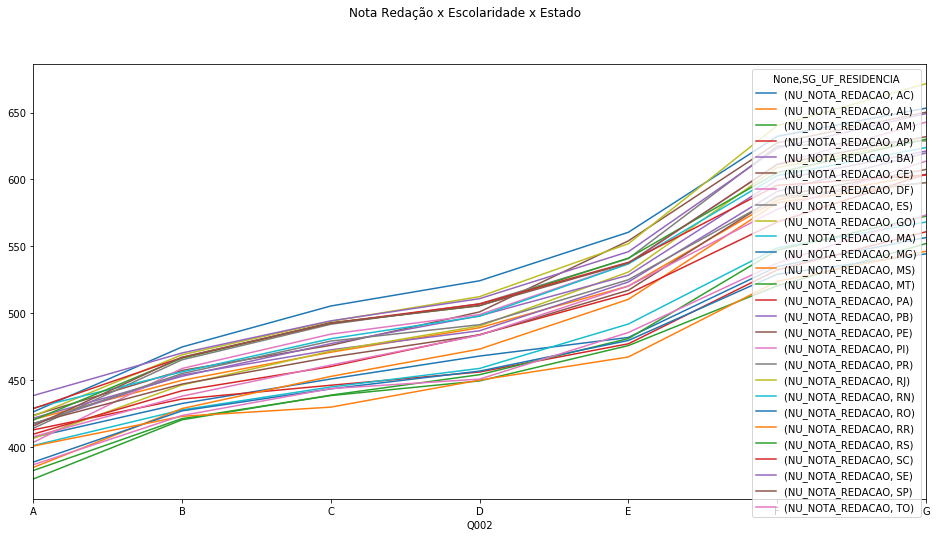

In [87]:
fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Nota Redação x Escolaridade x Estado')

microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA','Q002','NU_NOTA_REDACAO'])\
                        .where(microdadosEnemSelecionado.Q002 != 'H')\
                        .groupby(['Q002', 'SG_UF_RESIDENCIA'])\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                        .unstack().plot(ax=ax)
